# Разделение выборки для обучения семантической сегментации

In [1]:
import pandas as pd
import os
import cv2
import json
from PIL import Image, ImageDraw
import numpy as np
from tqdm.notebook import tqdm

import math

import matplotlib.pyplot as plt
import seaborn as sns

tqdm.pandas()

In [2]:
def read_img(image_name):
    image_name = image_name.split('.')[0] + '.JPG'
    
    img = cv2.imread(
        os.path.join(
            IMAGES_DIR, 
            image_name
        ),
        cv2.IMREAD_GRAYSCALE
    )

    return img

In [3]:
def read_coco(image_name):
    image_name = image_name.split('.')[0] + '.json'
    
    with open(os.path.join(MARKUPS_DIR, image_name), 'r') as f:
        data = json.load(f)
        
    return data

In [4]:
def mask_from_coco(img, polygons):
    img = Image.new('L', (img.shape[1], img.shape[0]), 0)
    for polygon in polygons:
        ImageDraw.Draw(img).polygon(polygon, outline=1, fill=1)  
    mask = np.array(img)
    
    return mask

In [5]:
BASE_DIR = 'data/min_of_nature/'
IMAGES_DIR = os.path.join(BASE_DIR, 'images')
MARKUPS_DIR = os.path.join(BASE_DIR, 'markup')

In [6]:
SEGMENTATION_IMAGES = 'walrus_dataset/images/'
SEGMENTATION_MASKS = 'walrus_dataset/masks/'

In [7]:
import glob

In [33]:
def clip_image(image_name):
    img = read_img(image_name)
    coco = read_coco(image_name)
    mask = mask_from_coco(img, [c['segmentation_poly'][0] for c in coco])
    
    h, w = img.shape[:2]
    
    k = 0
    
    for i, y_end in enumerate(range(300, img.shape[0], 300)):
        for j, x_end in enumerate(range(300, img.shape[1], 300)):
            img_name = image_name.split('.')[0] + f'{i}-{j}.JPG'
            print(img_name)
            
            y_start = y_end - 300
            x_start = x_end - 300
            
            img_part = img[y_start:y_end, x_start:x_end]
            mask_part = mask[y_start:y_end, x_start:x_end]
            
            # print(img_part.shape, mask_part.shape)
            
            cv2.imwrite(os.path.join(SEGMENTATION_IMAGES, img_name), img_part)
            cv2.imwrite(os.path.join(SEGMENTATION_MASKS, img_name), mask_part)

In [34]:
df = pd.read_csv('data/walrus_count.csv', index_col=0)

In [35]:
df.head()

,image_name,count
12,DJI_0003 (4).JPG,22
13,DJI_0003 (5).JPG,30
64,DJI_0021.JPG,32
116,org_96d6d6d684ea7c80_1626434080000.JPG,41
50,DJI_0018 (2).JPG,50


In [36]:
clip_image('DJI_0003 (4).JPG')

DJI_0003 (4)0-0.JPG
DJI_0003 (4)0-1.JPG
DJI_0003 (4)0-2.JPG
DJI_0003 (4)0-3.JPG
DJI_0003 (4)0-4.JPG
DJI_0003 (4)0-5.JPG
DJI_0003 (4)0-6.JPG
DJI_0003 (4)0-7.JPG
DJI_0003 (4)0-8.JPG
DJI_0003 (4)0-9.JPG
DJI_0003 (4)0-10.JPG
DJI_0003 (4)0-11.JPG
DJI_0003 (4)0-12.JPG
DJI_0003 (4)1-0.JPG
DJI_0003 (4)1-1.JPG
DJI_0003 (4)1-2.JPG
DJI_0003 (4)1-3.JPG
DJI_0003 (4)1-4.JPG
DJI_0003 (4)1-5.JPG
DJI_0003 (4)1-6.JPG
DJI_0003 (4)1-7.JPG
DJI_0003 (4)1-8.JPG
DJI_0003 (4)1-9.JPG
DJI_0003 (4)1-10.JPG
DJI_0003 (4)1-11.JPG
DJI_0003 (4)1-12.JPG
DJI_0003 (4)2-0.JPG
DJI_0003 (4)2-1.JPG
DJI_0003 (4)2-2.JPG
DJI_0003 (4)2-3.JPG
DJI_0003 (4)2-4.JPG
DJI_0003 (4)2-5.JPG
DJI_0003 (4)2-6.JPG
DJI_0003 (4)2-7.JPG
DJI_0003 (4)2-8.JPG
DJI_0003 (4)2-9.JPG
DJI_0003 (4)2-10.JPG
DJI_0003 (4)2-11.JPG
DJI_0003 (4)2-12.JPG
DJI_0003 (4)3-0.JPG
DJI_0003 (4)3-1.JPG
DJI_0003 (4)3-2.JPG
DJI_0003 (4)3-3.JPG
DJI_0003 (4)3-4.JPG
DJI_0003 (4)3-5.JPG
DJI_0003 (4)3-6.JPG
DJI_0003 (4)3-7.JPG
DJI_0003 (4)3-8.JPG
DJI_0003 (4)3-9.JPG
DJI_0003 (4

In [ ]:
plt.imshow(cv2.imread('./walrus_dataset/images/DJI_0003.JPG'))

In [45]:
np.unique(cv2.imread('./walrus_dataset/masks/DJI_0003 (4)5-7.JPG') / 2)

array([0. , 0.5, 1. ])

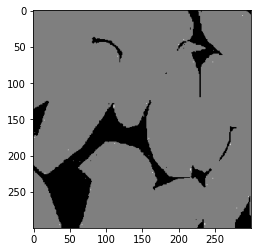

In [46]:
plt.imshow(cv2.imread('./walrus_dataset/masks/DJI_0003 (4)5-7.JPG') / 2)